In [5]:
import numpy as np
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import gestion_donnees as gd
import sys

In [9]:
class ClassifieurLineaire:
    def __init__(self, lamb, methode):
        """
        Algorithmes de classification lineaire

        L'argument ``lamb`` est une constante pour régulariser la magnitude
        des poids w et w_0

        ``methode`` :   1 pour classification generative
                        2 pour Perceptron
                        3 pour Perceptron sklearn
        """
        self.w = np.array([1., 2.]) # paramètre aléatoire
        self.w_0 = -5.              # paramètre aléatoire
        self.lamb = lamb
        self.methode = methode

    def entrainement(self, x_train, t_train):
        """
        Entraîne deux classifieurs sur l'ensemble d'entraînement formé des
        entrées ``x_train`` (un tableau 2D Numpy) et des étiquettes de classe cibles
        ``t_train`` (un tableau 1D Numpy).

        Lorsque self.method = 1 : implémenter la classification générative de
        la section 4.2.2 du libre de Bishop. Cette méthode doit calculer les
        variables suivantes:

        - ``p`` scalaire spécifié à l'équation 4.73 du livre de Bishop.

        - ``mu_1`` vecteur (tableau Numpy 1D) de taille D, tel que spécifié à
                    l'équation 4.75 du livre de Bishop.

        - ``mu_2`` vecteur (tableau Numpy 1D) de taille D, tel que spécifié à
                    l'équation 4.76 du livre de Bishop.

        - ``sigma`` matrice de covariance (tableau Numpy 2D) de taille DxD,
                    telle que spécifiée à l'équation 4.78 du livre de Bishop,
                    mais à laquelle ``self.lamb`` doit être ADDITIONNÉ À LA
                    DIAGONALE (comme à l'équation 3.28).

        - ``self.w`` un vecteur (tableau Numpy 1D) de taille D tel que
                    spécifié à l'équation 4.66 du livre de Bishop.

        - ``self.w_0`` un scalaire, tel que spécifié à l'équation 4.67
                    du livre de Bishop.

        lorsque method = 2 : Implementer l'algorithme de descente de gradient
                        stochastique du perceptron avec 1000 iterations

        lorsque method = 3 : utiliser la librairie sklearn pour effectuer une
                        classification binaire à l'aide du perceptron

        """
        if self.methode == 1:  # Classification generative
            print('Classification generative')

            # separate class c1 and c2 data
            x_c1 = np.array([x for i, x in enumerate(x_train) if t_train[i] == 1])
            x_c2 = np.array([x for i, x in enumerate(x_train) if t_train[i] == 0])

            # class c1 ratio
            p = len(x_c1) / len(x_train)

            # centers of mass
            mu_1 = np.average(x_c1, axis=0)
            mu_2 = np.average(x_c2, axis=0)

            # distances to centers
            dist_1 = x_c1 - mu_1
            dist_2 = x_c2 - mu_2

            # covariance matrix + lambda * I
            sigma = (1/len(x_train)) * (np.dot(dist_1.T, dist_1) + np.dot(dist_2.T, dist_2))
            sigma = sigma + self.lamb * np.identity(len(mu_1))

            s_inv = np.linalg.inv(sigma)
            self.w = np.dot(s_inv, (mu_1 - mu_2))
            self.w_0 = (
                np.dot(np.dot(mu_2.T, s_inv), mu_2)/2 -
                np.dot(np.dot(mu_1.T, s_inv), mu_1)/2 +
                np.log(p/(1-p))
                )

        elif self.methode == 2:  # Perceptron + SGD, learning rate = 0.001, nb_iterations_max = 1000
            print('Perceptron')
            # AJOUTER CODE ICI
            
            iterations = 1000
            alpha = 0.001
            self.w = np.random.rand(len(x_train[0]))
            self.w_0 = 1

            for _ in range(iterations):
                for x, z in zip(x_train, t_train):
                    # calculating the sign of y
                    # get error
                    error = self.erreur(z, self.prediction(x))
                    # Is it a misclassification?
                    if np.dot(np.dot(self.w.T, x) + self.w_0,error) < 0:
                        self.w += alpha * np.dot(x.T, error)   
                        self.w_0 += alpha * error

        else:  # Perceptron + SGD [sklearn] + learning rate = 0.001 + penalty 'l2' voir http://scikit-learn.org/
            print('Perceptron [sklearn]')
            perceptron = Perceptron(penalty="l2", alpha=self.lamb, max_iter=1000, eta0=0.001)
            perceptron.fit(x_train, t_train)
            self.w = perceptron.coef_[0]
            self.w_0 = perceptron.intercept_[0]

        print('w = ', self.w, 'w_0 = ', self.w_0, '\n')

    def prediction(self, x):
        """
        Retourne la prédiction du classifieur lineaire.  Retourne 1 si x est
        devant la frontière de décision et 0 sinon.

        ``x`` est un tableau 1D Numpy

        Cette méthode suppose que la méthode ``entrainement()``
        a préalablement été appelée. Elle doit utiliser les champs ``self.w``
        et ``self.w_0`` afin de faire cette classification.
        """
        # AJOUTER CODE ICI
        predict = np.dot(self.w, x) + self.w_0
        return int(predict > 0)

    @staticmethod
    def erreur(t, prediction):
        """
        Retourne l'erreur de classification, i.e.
        1. si la cible ``t`` et la prédiction ``prediction``
        sont différentes, 0. sinon.
        """
        # AJOUTER CODE ICI
        return int(not(t == prediction))

    def afficher_donnees_et_modele(self, x_train, t_train, x_test, t_test):
        """
        afficher les donnees et le modele

        x_train, t_train : donnees d'entrainement
        x_test, t_test : donnees de test
        """
        plt.figure(0)
        plt.scatter(x_train[:, 0], x_train[:, 1], s=t_train * 100 + 20, c=t_train)

        pente = -self.w[0] / self.w[1]
        xx = np.linspace(np.min(x_test[:, 0]) - 2, np.max(x_test[:, 0]) + 2)
        yy = pente * xx - self.w_0 / self.w[1]
        plt.plot(xx, yy)
        plt.title('Training data')

        plt.figure(1)
        plt.scatter(x_test[:, 0], x_test[:, 1], s=t_test * 100 + 20, c=t_test)

        pente = -self.w[0] / self.w[1]
        xx = np.linspace(np.min(x_test[:, 0]) - 2, np.max(x_test[:, 0]) + 2)
        yy = pente * xx - self.w_0 / self.w[1]
        plt.plot(xx, yy)
        plt.title('Testing data')

        plt.show()

    def parametres(self):
        """
        Retourne les paramètres du modèle
        """
        return self.w_0, self.w

Generation des données d'entrainement...
Generation des données de test...

Les données : 
X_train(280, 2)
t_train(280,)



Classification generative
w =  [-12.23226108  15.52909473] w_0 =  164.55383875583794 

Erreur d'entrainement =  0.0 %
Erreur de test =  0.0 %


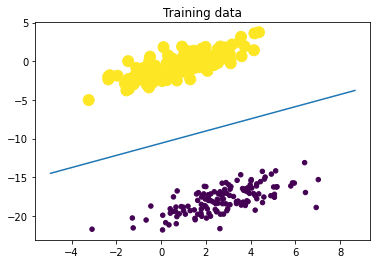

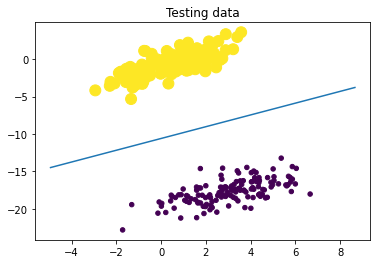

In [10]:
def main(method=1, nb_train=280, nb_test=280, lamb=0.001, bruit=0.5, donnees_aberrantes=1):

    "\n Usage: python classifieur.py method nb_train nb_test lambda bruit corruption don_ab\
    \n\n\t method : 1 => Classification generative\
    \n\t method : 2 => Perceptron + SDG \n\t method : 3 => Perceptron + SDG [sklearn]\
    \n\t nb_train, nb_test : nombre de donnees d'entrainement et de test\
    \n\t lambda >=0\
    \n\t bruit : multiplicateur de la matrice de variance-covariance (entre 0.1 et 50)\
    \n\t don_ab : production ou non de données aberrantes (0 ou 1) \
    \n\n\t ex : python classifieur_lineaire.py 1 280 280 0.001 1 1"
    
    print("Generation des données d'entrainement...")
    

    gestionnaire_donnees = gd.GestionDonnees(donnees_aberrantes, nb_train, nb_test, bruit)
    [x_train, t_train, x_test, t_test] = gestionnaire_donnees.generer_donnees()
    print("\nLes données : ")
    print("X_train" + str(x_train.shape))
    print("t_train" + str(t_train.shape))
    print("\n\n")
    classifieur = ClassifieurLineaire(lamb, method)

    # Entraînement de la classification linéaire
    classifieur.entrainement(x_train, t_train)

    # Prédictions sur les ensembles d'entraînement et de test
    predictions_entrainement = np.array([classifieur.prediction(x) for x in x_train])
    print("Erreur d'entrainement = ", 100*np.sum(np.abs(predictions_entrainement-t_train))/len(t_train), "%")

    predictions_test = np.array([classifieur.prediction(x) for x in x_test])
    print("Erreur de test = ", 100*np.sum(np.abs(predictions_test-t_test))/len(t_test), "%")

    # Affichage
    classifieur.afficher_donnees_et_modele(x_train, t_train, x_test, t_test)

if __name__ == "__main__":
    main()
